# I94 Heavy Traffic Indicators

The goal of this project is to determine a few indicators of heavy traffic on I94. The station that collect this data was midway between St. Paul and Minneapolis.  It only collected westbound traffic and the data was collected hourly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Traffic Volume

First, we want to look at the westbound traffic volume.  The traffic pattern in the area is crucial.  What we can see in the histogram below is that there were quite a few hours that had no traffic and quite a few hours that had at least 5000 cars passing through.  It is likely these changes are influenced by time of day.

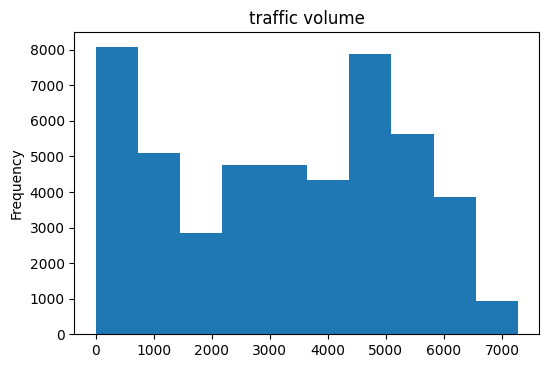

In [4]:
traffic['traffic_volume'].plot.hist()
plt.title('traffic volume')
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

When we try to take a look at the graph according to time as seen below, we can see we do not get much information because our data spans years.  However, we do see that there is a time gap in our data around the year 2015.  Upon further inspection, we can see that there is no data for the time period of August 8th, 2014 1am through June 11th 2015 at 10pm.  Although it would be nice to have this data, we can proceed to use the data we have.

In [6]:
traffic['date_time']=pd.to_datetime(traffic['date_time'])

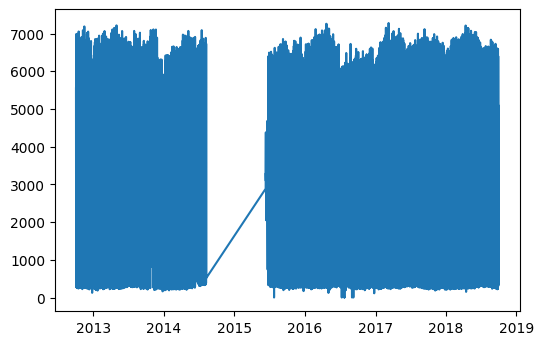

In [7]:
plt.plot(traffic['date_time'], traffic['traffic_volume'])
plt.show()

In [8]:
print(traffic.loc[traffic['date_time'].dt.year == 2015,'date_time' ].min())
#                                                .value_counts()
#                                                .sort_index())
#print('\n')
print(traffic.loc[traffic['date_time'].dt.year == 2014,'date_time' ].max())
#                                                .value_counts()
#                                                .sort_index())

2015-06-11 20:00:00
2014-08-08 01:00:00


In [9]:
# Day of week column added for use later on in exploration;
traffic['day_of_week']=traffic['date_time'].dt.dayofweek

The following code is used to seperate the data by year and get a graph of each time series by year to see if there are any trends in the data.

In [10]:
# dataframe is already sorted by date
# grabbing the amount of datapoints for each year
year_obs = traffic['date_time'].dt.year.value_counts().sort_index()
# storing the years in a seperate list to cycle through
years = list(year_obs.index)

In [11]:
# Stores the data in the dictionary by year
yearly_traffic_volume = {}
sum_obs = 0
for key in years :
    yearly_traffic = traffic[sum_obs:sum_obs + year_obs[key]]
    yearly_traffic_volume[key]= yearly_traffic
    sum_obs += year_obs[key]

In [12]:
# checking to make sure data was stored properly
# All years were checked, below is an example of 1 year
yearly_traffic_volume[2018]['date_time'].value_counts().sort_index()

2018-01-01 00:00:00    1
2018-01-01 01:00:00    1
2018-01-01 02:00:00    1
2018-01-01 03:00:00    1
2018-01-01 04:00:00    1
                      ..
2018-09-30 19:00:00    1
2018-09-30 20:00:00    1
2018-09-30 21:00:00    1
2018-09-30 22:00:00    1
2018-09-30 23:00:00    1
Name: date_time, Length: 6533, dtype: int64

In [13]:
#Creating labels for the graphs
monthly_labels = {1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',
                  5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 
                  9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [14]:
def labels_and_ticks(year, series) :
    
    dates = series

    new_ticks = pd.Series(dtype = 'object')
    new_labels = []
    for i in range(1,13) :
        # This grabs the first element for each month without the year
        tik = pd.Series(dates[dates.dt.month==i].head(1).dt.strftime('%m-%d %H:'))
        if not tik.empty :
            # This gets the month integer
            key = int(dates[dates.dt.month==i].head(1).dt.strftime('%m'))
            # Stores tik in new_ticks
            new_ticks =new_ticks.append(tik)
            # Accesses monthly_label dictionary to store the label for that month
            new_labels.append(monthly_labels[key])
    return new_ticks, new_labels

### Traffic Volume by Year

The graphs below show the traffic volume by year.  Not all years have all 12 month. In the years do have December data we see a decline in overall traffic volume.  This is likely due to snow and ice being on the roads making it less likely people will travel since the roads are less safe.  Not only this, but schools and other workplaces often shut down for a break during the holidays.
This could also explain the drop in traffic volumes around July as there is no school.  Also many people will be headded on vacation leading to a decrease in volumen on their commuter routes. This indicates that there is seasonality in our data.

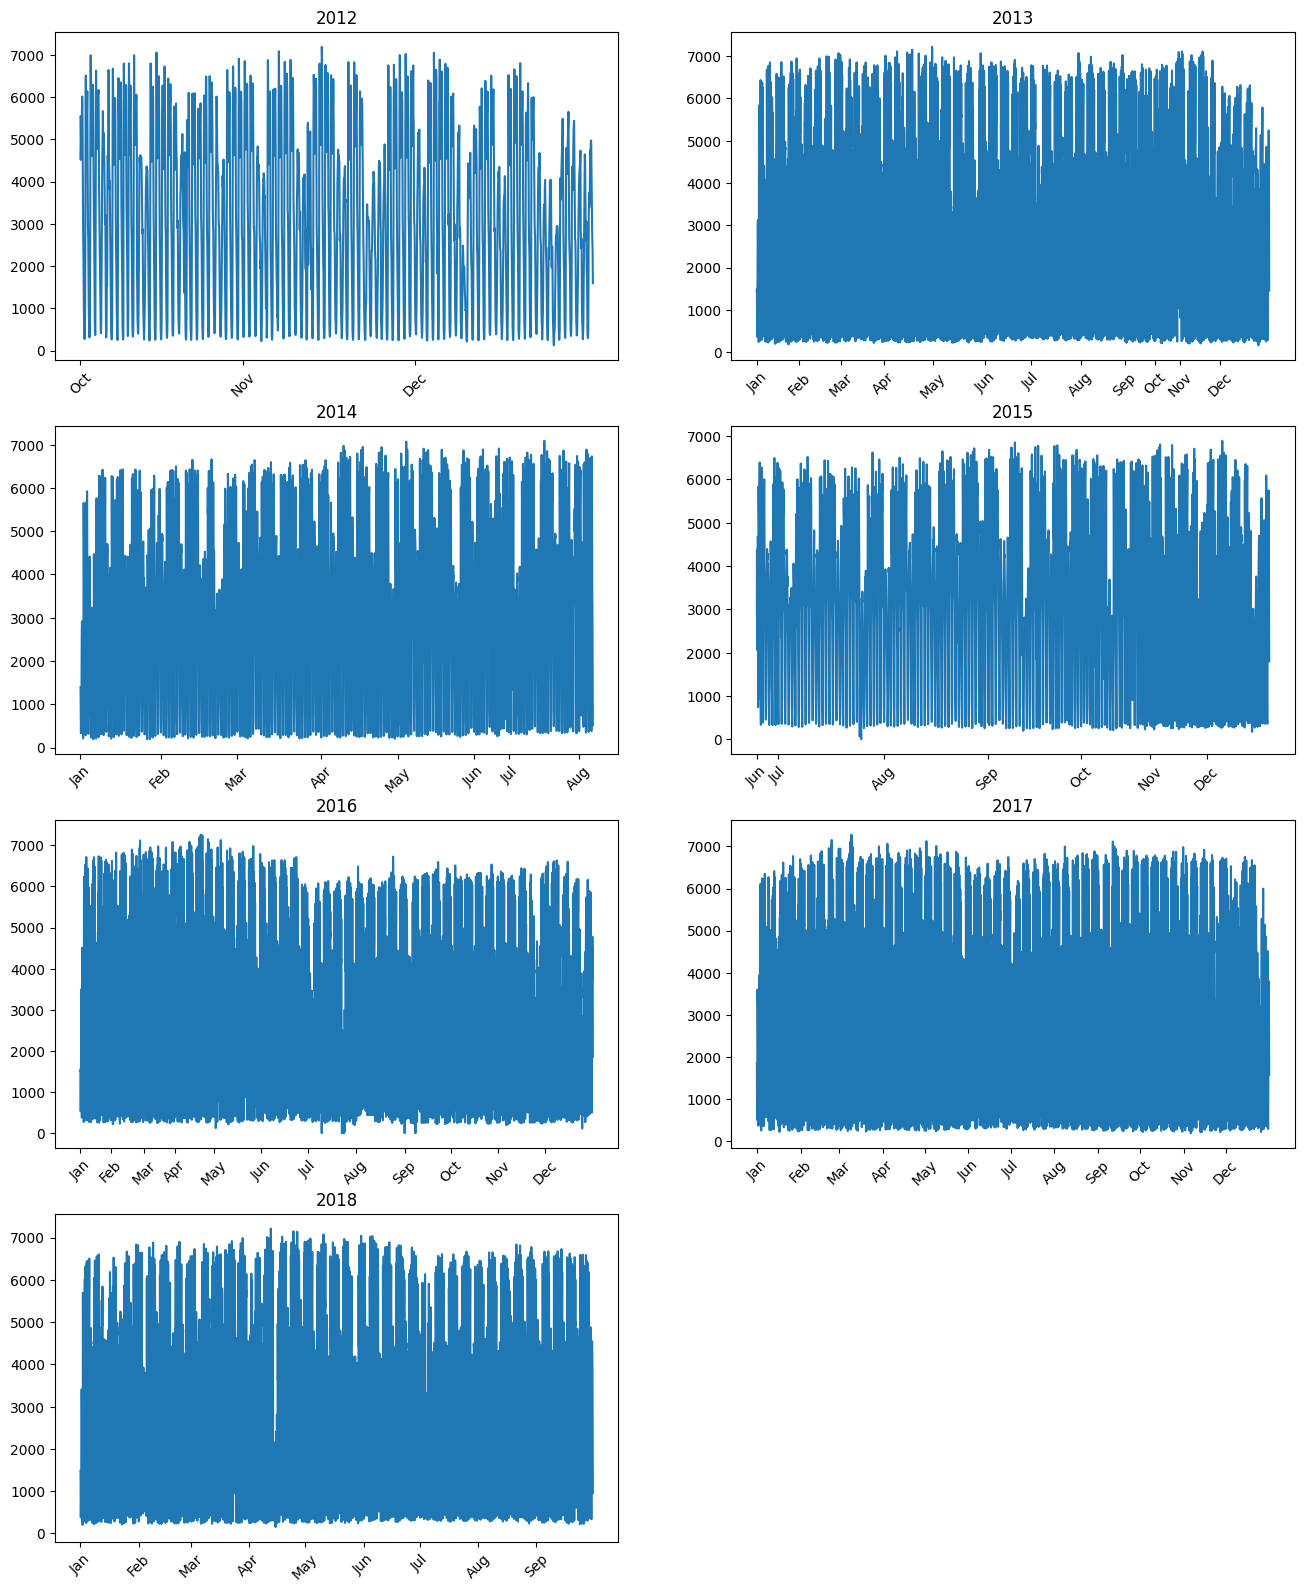

In [15]:
plt.figure(figsize=(16,20))
for year, i in zip(range(2012, 2019),range(1,9)) :
    plt.subplot(4, 2, i)
    plt.plot(yearly_traffic_volume[year]['date_time'].dt.strftime('%m-%d %H:'),
         yearly_traffic_volume[year]['traffic_volume'])
    a=labels_and_ticks(year, yearly_traffic_volume[year]['date_time'])
    plt.xticks(ticks=a[0], labels=a[1], rotation = 45)
    plt.title(year)
plt.show()

### Traffic Volume by Day of the Week

Now that we know that the time of year affects the traffic volume, we will want to look more closely at each week.  It is likely the day of the week has an impact on traffic since the standard work week is Monday through Friday.  For the purpose of seeing any distinct pattern, we will focus on one year. Since 2013 has a lot of datapoints and has all of the months in the dataset, we will use this data to see if there is a day of week pattern to our data.

In [16]:
days_of_week=['Sunday','Monday','Tuesday','Wednesday',
              'Thursday','Friday','Saturday' ]

#We will use the column added to the dataset before we split the data
day_obs = (yearly_traffic_volume[2013]['day_of_week']
           .value_counts().sort_index())

#sorts data so all Sundays are on top, followed by mondays and so forth
sorted_yearly = yearly_traffic_volume[2013].sort_values('day_of_week')
# Stores the data in the dictionary by weekday for 2013
weekday_traffic_volume = {}
sum_obs=0
for i in range(0,7) :
    weekday_traffic = sorted_yearly[sum_obs:sum_obs + day_obs[i]]
    weekday_traffic_volume[days_of_week[i]]= weekday_traffic
    sum_obs += day_obs[i]

In [17]:
# Checking to see what each dataset looks like for our date_time column
weekday_traffic_volume['Saturday']['date_time']

11073   2013-12-29 16:00:00
11072   2013-12-29 15:00:00
11071   2013-12-29 14:00:00
11070   2013-12-29 13:00:00
11069   2013-12-29 12:00:00
                ...        
3475    2013-02-10 08:00:00
3474    2013-02-10 08:00:00
3473    2013-02-10 07:00:00
3481    2013-02-10 14:00:00
7668    2013-07-14 06:00:00
Name: date_time, Length: 1232, dtype: datetime64[ns]

In [18]:
#checking to make sure we have the correct number of counts
#weekday_traffic_volume['Sunday']['day_of_week'].value_counts()
#weekday_traffic_volume['Monday']['day_of_week'].value_counts()
#weekday_traffic_volume['Tuesday']['day_of_week'].value_counts()
#weekday_traffic_volume['Wednesday']['day_of_week'].value_counts()
#weekday_traffic_volume['Thursday']['day_of_week'].value_counts()
#weekday_traffic_volume['Friday']['day_of_week'].value_counts()
weekday_traffic_volume['Saturday']['day_of_week'].value_counts()

6    1232
Name: day_of_week, dtype: int64

As you can see above, we successfully seperated our data and verified our counts.  Although Saturday is the only `date_time data` shown above, all of the data was verified using the `value_counts()` method.  What you can see above is that the data was not kept inorder when placed in a new dataset.  Before plotting each dataset, we will need to put the data back in order.

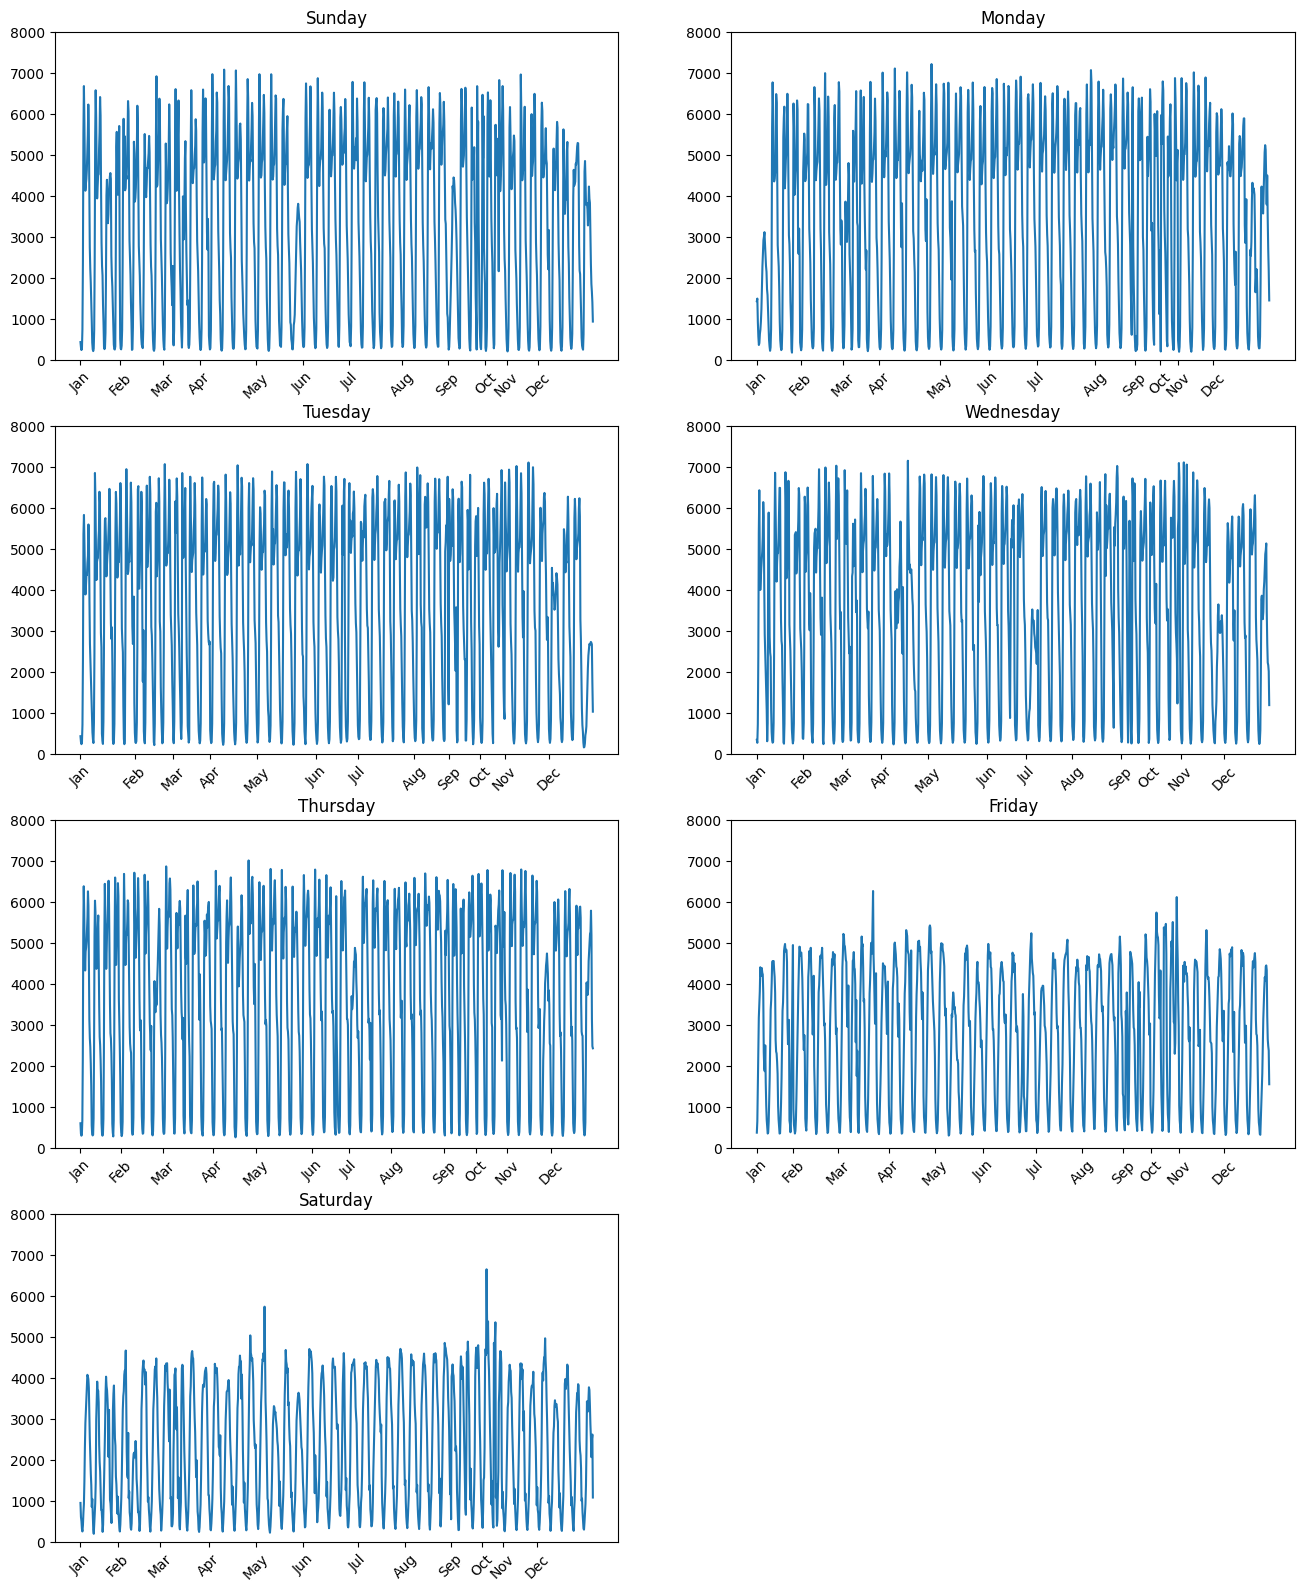

In [19]:
#plots the individual daily graphs
plt.figure(figsize=(16,20))
for day, i in zip(days_of_week,range(1,9)) :
    weekday = weekday_traffic_volume[day].sort_values('date_time')
    plt.subplot(4, 2, i)
    plt.plot(weekday['date_time'].dt.strftime('%m-%d %H:'),
         weekday['traffic_volume'])
    a=labels_and_ticks(2013,weekday['date_time'] )
    plt.xticks(ticks=a[0], labels=a[1], rotation = 45)
    plt.title(day)
    plt.ylim([0,8000])
plt.show()


From the graphs above, we can see that there is a drop in traffic volume on Friday and Saturday.  It is surprising that Sunday did not follow this same trend.  However, on Sundays people are likely going to Church, running errands such as grocery shopping, or visiting friends and family.

### Traffic Volume: Day vs. Night

The time of day likely has an impact on traffic volume for I94.  We would like to verify this information.  For the purpose of this investigation, we are going to consider daytime the hours between 7am and 7pm.  Night time will be after 7pm and before 7am.

In [20]:
day_traffic = traffic[(traffic['date_time'].dt.hour >= 7) 
                      & (traffic['date_time'].dt.hour<=19)]

night_traffic = traffic[(traffic['date_time'].dt.hour < 7) 
                      | (traffic['date_time'].dt.hour>19)]

In [21]:
day_traffic['date_time'].dt.hour.value_counts().sort_index()
night_traffic['date_time'].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

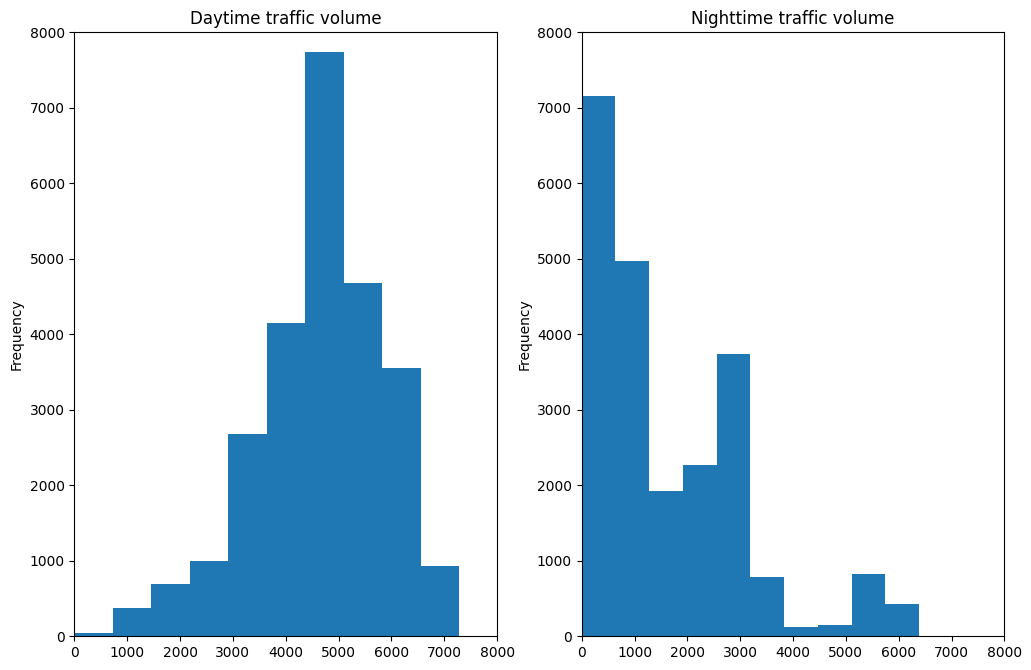

In [22]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
day_traffic['traffic_volume'].plot.hist()
plt.title('Daytime traffic volume')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.subplot(1, 2, 2)
night_traffic['traffic_volume'].plot.hist()
plt.title('Nighttime traffic volume')
plt.xlim([0,8000])
plt.ylim([0,8000])

plt.show()

In [25]:
#day['month'] = day['date_time'].dt.month
#by_month = day.groupby('month').mean()
#by_month['traffic_volume']